We use sklearn to split the data, and the GaussianNB (Naive Bayes for continuous data) model from sklearn.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We need to split the data into two parts:
- Features (X): All the columns that are used for prediction.
- Target (y): The column that we want to predict (the label).

In [2]:
data = pd.read_csv('../../data/encode/labelEncoded_DiseaseAndSymptoms.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,130,99,72,32,130,130,130,130,130,130,130,130,130,130,130,130,130
1,15,99,72,32,130,130,130,130,130,130,130,130,130,130,130,130,130,130
2,15,130,72,32,130,130,130,130,130,130,130,130,130,130,130,130,130,130
3,15,130,99,32,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,15,130,99,72,130,130,130,130,130,130,130,130,130,130,130,130,130,130


In [3]:
# Define the features (X) and the target (y)
X = data.drop('Disease', axis=1)  
y = data['Disease']  

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model training

In [4]:
# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

GaussianNB()

Model predictions and evaluation

In [5]:
# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.03581526861451461
Confusion Matrix:
[[3 0 2 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.13      0.07        23
           1       0.00      0.00      0.00        22
           2       0.06      0.06      0.06        16
           3       0.00      0.00      0.00        32
           4       0.06      0.03      0.04        31
           5       0.00      0.00      0.00        22
           6       0.05      0.03      0.04        34
           7       0.06      0.04      0.05        25
           8       0.06      0.05      0.06        20
           9       0.07      0.04      0.05        27
          10       0.04      0.15      0.07        20
          11       0.07      0.13      0.09        31
          12       0.06      0.03      0.04        31
          13       0.00      0.00      0.00        2

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


perform feature selection to identify and retain only the most relevant feature

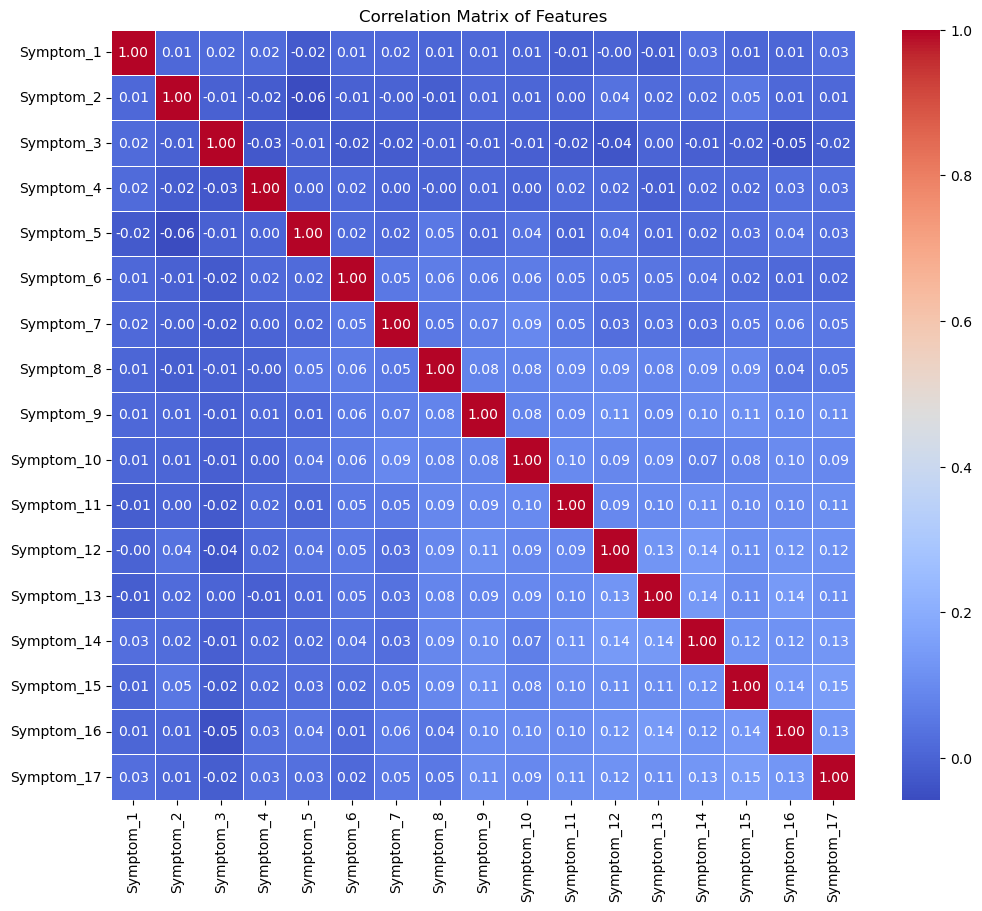

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the features (excluding the target variable)
correlation_matrix = data.drop(columns=['Disease']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Perform Chi-square for feature selection

 will perform the Chi-square test to evaluate the relationship between the remaining features and the target variable Disease.

In [8]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Separate features (X) and target (y)
X = data.drop(columns=['Disease'])
y = data['Disease']

# Apply the Chi-square test for feature selection
chi2_selector = SelectKBest(chi2, k='all')  # Use 'all' to evaluate all features
X_new = chi2_selector.fit_transform(X, y)

# Get the p-values for each feature
p_values = chi2_selector.pvalues_

# Show the p-values for each feature
feature_p_values = pd.DataFrame({'Feature': X.columns, 'P-value': p_values})
print("Chi-Square Test P-values:\n", feature_p_values)

Chi-Square Test P-values:
        Feature        P-value
0    Symptom_1   0.000000e+00
1    Symptom_2  6.513624e-176
2    Symptom_3  1.961514e-131
3    Symptom_4  6.417662e-229
4    Symptom_5  1.790542e-164
5    Symptom_6  1.042941e-261
6    Symptom_7  2.092443e-178
7    Symptom_8  1.604056e-202
8    Symptom_9  4.009318e-250
9   Symptom_10  1.107081e-109
10  Symptom_11  1.050288e-206
11  Symptom_12  3.822661e-157
12  Symptom_13  1.273802e-172
13  Symptom_14  2.370809e-217
14  Symptom_15  7.430723e-199
15  Symptom_16  8.903646e-136
16  Symptom_17  2.318090e-142


The Chi-square test results show the p-values for each feature. Features with very small p-values (like Symptom_1 with 0.000000e+00) indicate that these features are strongly associated with the target variable (Disease).

Training model again (gaussian NB)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Prepare the data
X = data.drop(columns=['Disease'])
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = nb.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.038316582914572864
Confusion Matrix:
[[5 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [3 0 0 ... 0 2 1]
 [2 0 0 ... 1 0 1]
 [3 0 0 ... 0 1 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.12      0.08        40
           1       0.00      0.00      0.00        28
           2       0.07      0.03      0.04        30
           3       0.00      0.00      0.00        42
           4       0.06      0.03      0.04        38
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        48
           7       0.05      0.05      0.05        37
           8       0.00      0.00      0.00        38
           9       0.05      0.03      0.04        37
          10       0.08      0.22      0.11        32
          11       0.05      0.08      0.07        49
          12       0.07      0.05      0.05        44
          13       0.00      0.00      0.00        

- precision: If a model predicts 10 diseases as "Disease A," and only 6 of them are actually "Disease A," the precision for "Disease A" would be 0.6 (60%).
- recall: If there are 10 actual cases of "Disease A," and the model only identifies 6 of them, the recall would be 0.6 (60%).
- The F1-score is the harmonic mean of Precision and Recall. It provides a single metric that combines both Precision and Recall into one number. The F1-score is particularly useful when the data is imbalanced (i.e., one class is much more frequent than the other), as it gives a balance between precision and recall.
- support:  If you have 1000 samples in total, and 40 of them belong to "Disease 0," then the support for "Disease 0" would be 40.